## Evaluate tree detection model

In [1]:
import pandas as pd
import numpy as np
import json
from collections import Counter
from sklearn.metrics import PrecisionRecallDisplay
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
from utils import predict_locations, match_preds_to_gts, get_precision_recall, haversine_distance, get_nearest_panos, show_anns, geo_coords_to_streetview_pixel

In [2]:
%load_ext autoreload
%autoreload 2

### Evaluate predicted annotations in images

In [599]:
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval

In [ ]:
# Choose dataset split
split = 'test'

# Load predicted annotated trees
anns_pred = COCO(f'data/predictions/predictions_annotations_{split}.json');
# Load ground truth annotated trees
anns_gt = COCO(f'data/annotations/annotations_{split}_single_label.json');
anns_pred = anns_gt.loadRes(anns_pred.dataset['annotations']);

In [630]:
# Evaluate model
E = COCOeval(anns_gt, anns_pred, iouType='bbox');
E.evaluate();
E.accumulate();
E.summarize();

Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=2.22s).
Accumulating evaluation results...
DONE (t=0.38s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.269
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.675
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.152
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.004
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.270
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.121
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.421
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.421
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1

In [1545]:
# Evaluate on Pasadena dataset

# Load predicted annotated trees
anns_pred_pd = COCO(f'data/predictions/predictions_annotations_{split}_pd.json');
# Load ground truth annotated trees
anns_gt_pd = COCO(f'data/annotations/annotations_{split}_single_label_pd.json');
anns_pred_pd = anns_gt_pd.loadRes(anns_pred_pd.dataset['annotations']);

# Evaluate model
E_pd = COCOeval(anns_gt_pd, anns_pred_pd, iouType='bbox');
E_pd.evaluate();
E_pd.accumulate();
E_pd.summarize();

loading annotations into memory...
Done (t=0.66s)
creating index...
index created!
loading annotations into memory...
Done (t=0.04s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.02s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=2.38s).
Accumulating evaluation results...
DONE (t=0.28s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.055
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.225
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.010
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.055
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.032
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | ma

In [1547]:
# Evaluate on finetuned Pasadena dataset

# Load predicted annotated trees
anns_pred_pd_ft = COCO(f'data/predictions/predictions_annotations_{split}_pd_ft.json');
# Load ground truth annotated trees
anns_pred_pd_ft = anns_gt_pd.loadRes(anns_pred_pd_ft.dataset['annotations']);

# Evaluate model
E_pd_ft = COCOeval(anns_gt_pd, anns_pred_pd_ft, iouType='bbox');
E_pd_ft.evaluate();
E_pd_ft.accumulate();
E_pd_ft.summarize();

loading annotations into memory...
Done (t=0.73s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.02s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=2.37s).
Accumulating evaluation results...
DONE (t=0.29s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.235
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.603
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.130
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.235
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.086
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.431
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDe

### Load predicted- and gt predicted annotated trees

In [18]:
split = 'test'

# Load ground truth trees
trees_gt = pd.read_csv('data/raw/tree_inventory_cleaned.csv')
trees_gt = trees_gt[trees_gt['split'] == split]
# Load irrelevant gt trees
trees_gt_irrelevant = pd.read_csv('data/raw/tree_inventory_cleaned_irrelevant.csv')

# Load mappings from gt annotated trees in images to actual trees
with open(f'data/mappings/mappings.json', 'r') as fp:
    mappings = json.load(fp)

# Load panorama images
with open('data/raw/panos.json', 'r') as fp:
    panos = json.load(fp)

### Make final predictions

In [4]:
print('N. of gt trees:', len(trees_gt))

N. of gt trees: 3892


In [104]:
# Define thresholds
max_dist_cluster = 4 # max distance of two trees in same cluster
ann_to_cluster = {}
last_cluster_label = 0

# Make predictions for all splits and save them
for split in ['train', 'val', 'test']:

    # Load predicted annotations
    with open(f'data/predictions/predictions_annotations_{split}.json', 'r') as fp:
        anns_pred = json.load(fp)
    filepath_preds = f'data/predictions/predictions_{split}.csv'
    
    # Make final predictions
    trees_pred, ann_to_cluster, last_cluster_label = predict_locations(max_dist_cluster,
                                                                       18,
                                                                       anns_pred.copy(), 
                                                                       panos, 
                                                                       ann_to_cluster, 
                                                                       last_cluster_label,
                                                                       filepath_preds)
    
# Save mapping
with open('data/mappings/ann_to_cluster.json', 'w') as fp:
    json.dump(ann_to_cluster, fp)

Precision is how many of the predicted trees that are matched to a gt tree.  
Recall is how many of the gt trees that are matched to a predicted tree.  

In [20]:
max_dist_tp = 4 # max distance between pred and gt tree to be tp

In [55]:
# Get precisions and recalls at increasing confidence thresholds
n_thresholds = 200
precisions, recalls, thresholds = get_precision_recall(trees_pred, trees_gt, n_thresholds, max_dist_tp)

In [56]:
# Get Average Precision
ap = 0
for i in range(0, len(thresholds)-1):
    ap += (recalls[i] - recalls[i+1]) * precisions[i]
print(f'Average precision (AP): {round(ap, 3)}')

Average precision (AP): 0.835


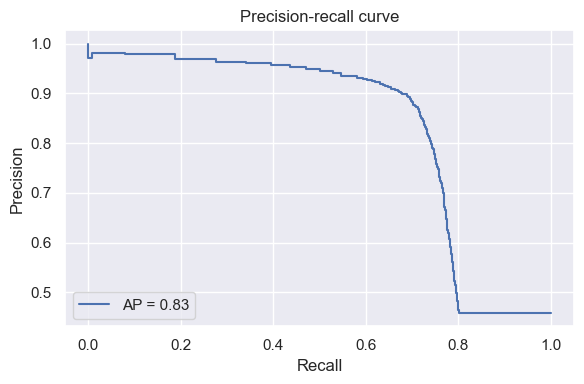

In [57]:
# Plot precision-recall curve
fig, ax = plt.subplots(figsize=(6, 4))
PrecisionRecallDisplay(precisions, recalls, average_precision=ap).plot(ax=ax)
ax.set_title('Precision-recall curve')
plt.tight_layout()
plt.savefig('visualizations/prec_rec.png', bbox_inches='tight', pad_inches=0)
plt.show()

In [58]:
# Get score threshold at best balance between precision and recall
f_score = (2 * precisions[1:-1] * recalls[1:-1]) / (precisions[1:-1] + recalls[1:-1])
i_best_th = len(f_score) - np.argmax(f_score[::-1])
print(f'Best confidence score threshold: {round(thresholds[i_best_th], 3)}')
print(f'\tF-score: {round(f_score[i_best_th], 3)}')
print(f'\tPrecision: {round(precisions[i_best_th], 3)}')
print(f'\tRecall: {round(recalls[i_best_th], 3)}')

Best confidence score threshold: 0.795
	F-score: 0.784
	Precision: 0.872
	Recall: 0.713


In [128]:
k = 65
precisions[k], recalls[k]

(0.8013888888888889, 0.7412641315519013)

In [114]:
# Sort out trees below threshold
score_th = 0.795 #thresholds[i_best_th]
trees_pred_th = trees_pred[trees_pred['max_score'] >= score_th].copy()

# Match predicted trees to gt trees
pred_to_gt = match_preds_to_gts(trees_pred_th, trees_gt, max_dist_tp)
with open('data/mappings/pred_to_gt.json', 'w') as fp:
    json.dump(pred_to_gt, fp)

In [115]:
# Print statistics about gt- and predicted trees
print('N. of gt trees:', len(trees_gt))
print('N. of predicted trees:', len(trees_pred_th))

N. of gt trees: 3240
N. of predicted trees: 3183


In [116]:
len(trees_gt) - len(pred_to_gt), len(trees_pred_th) - len(pred_to_gt)

(494, 437)

In [117]:
# Get predicted trees with no matched relevant gt tree and with matched irrelevant gt tree
trees_pred_no_match = trees_pred_th[~trees_pred_th['id'].isin(pred_to_gt.keys())]
pred_to_gt_irrelevant = match_preds_to_gts(trees_pred_no_match, trees_gt_irrelevant, max_dist_tp)
trees_pred_th['relevant'] = trees_pred_th['id'].apply(lambda cluster_id: cluster_id not in pred_to_gt_irrelevant)

n_irrelevant = len(pred_to_gt_irrelevant)
print(f'N. of irrelevant predicted trees: {n_irrelevant} ({round((n_irrelevant / len(trees_pred_no_match))*100)}% of predicted trees with no matched relevant gt tree)')

N. of irrelevant predicted trees: 73 (17% of predicted trees with no matched relevant gt tree)


In [118]:
print(f'Precision when removing known non-relevant trees: {round(len(pred_to_gt) / len(trees_pred_th[trees_pred_th["relevant"]]), 3)}')

Precision when removing known non-relevant trees: 0.883


In [110]:
del trees_pred_th['relevant']

### Get AP at different max_dist_tp

In [65]:
# Get recall at different max_dist_tp
precisions_15, recalls_15, thresholds = get_precision_recall(trees_pred, 
                                                             trees_gt, 
                                                             n_thresholds, 
                                                             max_dist_tp=15)

In [66]:
# Get score threshold at best balance between precision and recall
f_score_15 = (2 * precisions_15[1:-1] * recalls_15[1:-1]) / (precisions_15[1:-1] + recalls_15[1:-1])
i_best_th_15 = len(f_score_15) - np.argmax(f_score_15[::-1])
print(f'Best confidence score threshold: {round(thresholds[i_best_th_15], 3)}')
print(f'\tF-score: {round(f_score_15[i_best_th_15], 3)}')
print(f'\tPrecision: {round(precisions_15[i_best_th_15], 3)}')
print(f'\tRecall: {round(recalls_15[i_best_th_15], 3)}')

Best confidence score threshold: 0.795
	F-score: 0.807
	Precision: 0.897
	Recall: 0.734


### Get results when removing trees with no image

In [67]:
# Get precisions and recalls at increasing confidence thresholds
tree_ids_w_img = set(mappings['ann_to_tree'].values())
trees_gt_w_img = trees_gt[trees_gt['id'].isin(tree_ids_w_img)]
precisions_w_img, recalls_w_img, thresholds = get_precision_recall(trees_pred, 
                                                                   trees_gt_w_img, 
                                                                   n_thresholds, 
                                                                   max_dist_tp)

In [68]:
# Get Average Precision
ap_w_img = 0
for i in range(0, len(thresholds)-1):
    ap_w_img += (recalls_w_img[i] - recalls_w_img[i+1]) * precisions_w_img[i]
print(f'Average precision (AP): {round(ap_w_img, 3)}')

Average precision (AP): 0.899


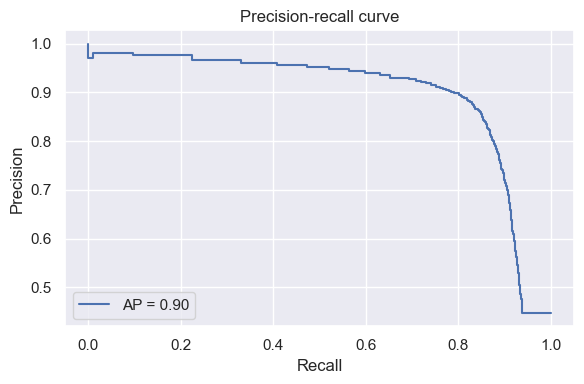

In [69]:
# Plot precision-recall curve
fig, ax = plt.subplots(figsize=(6, 4))
PrecisionRecallDisplay(precisions_w_img, recalls_w_img, average_precision=ap_w_img).plot(ax=ax)
ax.set_title('Precision-recall curve')
plt.tight_layout()
# plt.savefig('visualizations/prec_rec.png', bbox_inches='tight', pad_inches=0)
plt.show()

In [70]:
# Get score threshold at best balance between precision and recall
f_score_w_img = (2 * precisions_w_img[1:-1] * recalls_w_img[1:-1]) / (precisions_w_img[1:-1] + recalls_w_img[1:-1])
i_best_th_w_img = len(f_score_w_img) - np.argmax(f_score_w_img[::-1])
print(f'Best confidence score threshold: {round(thresholds[i_best_th_w_img], 3)}')
print(f'\tF-score: {round(f_score_w_img[i_best_th_w_img], 3)}')
print(f'\tPrecision: {round(precisions_w_img[i_best_th_w_img], 3)}')
print(f'\tRecall: {round(recalls_w_img[i_best_th_w_img], 3)}')

Best confidence score threshold: 0.795
	F-score: 0.855
	Precision: 0.863
	Recall: 0.848


### Get distribution of distances between matched predicted- and gt trees

In [71]:
# Get distribution of distances between matched predicted- and gt trees
dists = []
for tree_id_pred, tree_id_gt in pred_to_gt.items():
    loc_pred = trees_pred[trees_pred['id'] == tree_id_pred][['lat', 'lng']].values[0]
    loc_gt = trees_gt[trees_gt['id'] == tree_id_gt][['lat', 'lng']].values[0]
    dists.append(haversine_distance(*loc_pred, *loc_gt))
print(f'Min: {round(min(dists), 3)} \nMax: {round(max(dists), 2)} \nMean: {round(np.mean(dists), 2)}')

Min: 0.022 
Max: 3.98 
Mean: 1.25


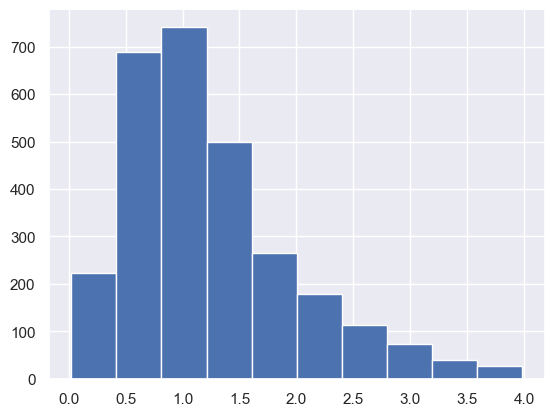

In [72]:
plt.hist(dists);

In [73]:
len([dist for dist in dists if dist <= 1.5]) / len(dists)

0.7112280701754385

### Get distribution of gt species for predicted trees with matched gt tree

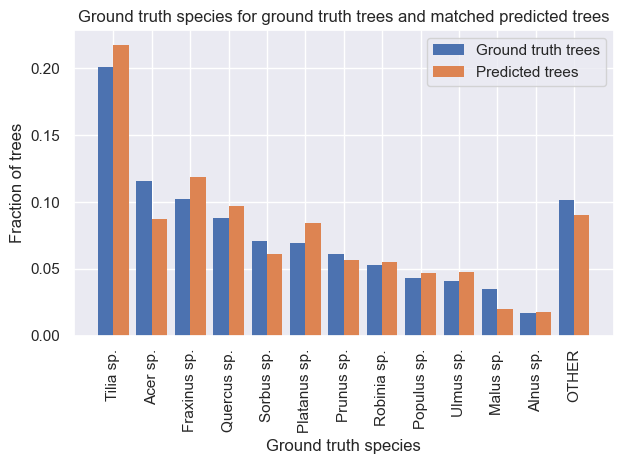

In [74]:
# Get top k species in gt trees
k = 12
top_k_species = list(trees_gt.groupby('slaegt').size().sort_values(ascending=False).index)[:k]

# Get ground truth labels of predicted trees with matching gt tree
labels_pred = trees_gt[trees_gt['id'].isin(pred_to_gt.values())]['slaegt']
labels_gt = trees_gt['slaegt']

# Change the label of trees with species that are not in top k labels to 'OTHER'
labels_pred_top = [label for label in labels_pred if label in top_k_species] 
labels_gt_top = [label for label in labels_gt if label in top_k_species] 

# Sort species by n. of predicted trees
labels_pred_top = [label for label, count in Counter(labels_pred_top).most_common() for label_name in [label] * count]
labels_gt_top = [label for label, count in Counter(labels_gt_top).most_common() for label_name in [label] * count]
labels_pred_top += ['OTHER'] * (len(labels_pred) - len(labels_pred_top))
labels_gt_top += ['OTHER'] * (len(labels_gt) - len(labels_gt_top))

# Plot distribution of species
n_classes = k+1
plt.hist([labels_gt_top, labels_pred_top], bins=range(n_classes+1), align='left', density=True, edgecolor='none')
plt.xticks(ticks=range(n_classes), rotation=90)
plt.title(f'Ground truth species for ground truth trees and matched predicted trees')
plt.xlabel('Ground truth species')
plt.ylabel('Fraction of trees')
plt.legend(['Ground truth trees', 'Predicted trees'])
plt.tight_layout()
plt.show()

### Get distribution of confidence scores for predicted trees

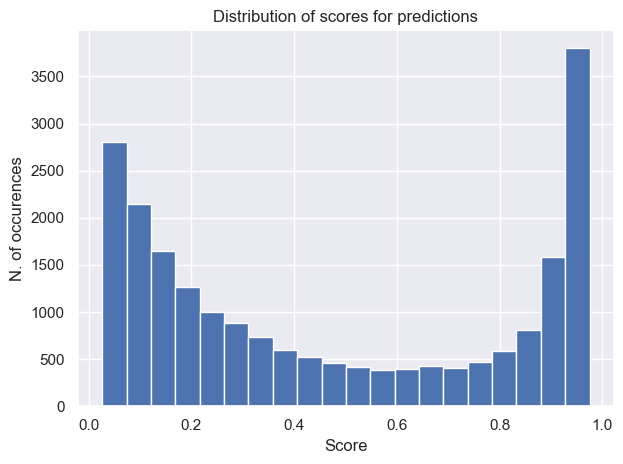

In [75]:
# Plot distribution of scores for predicted annotated trees
scores = sorted([ann['score'] for ann in anns_pred['annotations']])
n_classes = 20 #len(np.unique(scores))
plt.hist(scores, bins=n_classes, align='left')#, density=True)
plt.title(f'Distribution of scores for predictions')
plt.xlabel('Score')
plt.ylabel('N. of occurences')
plt.tight_layout()
plt.show()

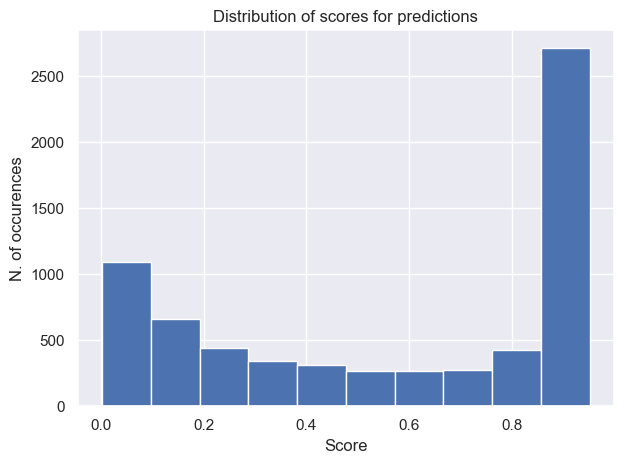

In [76]:
# Plot distribution of scores for final predicted trees
scores = sorted(trees_pred['max_score'].values)
n_classes = 10 #len(np.unique(scores))
plt.hist(scores, bins=n_classes, align='left')#, density=True)
plt.title(f'Distribution of scores for predictions')
plt.xlabel('Score')
plt.ylabel('N. of occurences')
plt.tight_layout()
plt.show()

### Get performance on trees with different number of images available

In [119]:
tree_ids_split = trees_gt['id'].values
ann_to_tree_split = {ann_id: tree_id for ann_id, tree_id in mappings['ann_to_tree'].items() if tree_id in tree_ids_split}
anns_per_tree = list(Counter(ann_to_tree_split.values()).values())
tree_to_n_anns = Counter(ann_to_tree_split.values())
n_anns_trees = Counter(tree_to_n_anns.values())

In [120]:
n_anns_results = {n_imgs: 0 for n_imgs in set(n_anns_trees.keys())}
for tree_id in tree_ids_split:
    if tree_id in mappings['ann_to_tree'].values():
        if tree_id in set(pred_to_gt.values()):
            n_anns_results[tree_to_n_anns[tree_id]] += 1

recalls_n_anns = [n_anns_results[n] / n_anns_trees[n] for n in range(1, len(n_anns_results)+1)]

In [121]:
n_anns_trees_pred = {n_imgs: 0 for n_imgs in range(1, 10)}
tree_to_n_anns_pred = {}
for tree_id in trees_pred_th['id']:
    ann_ids_tree = [ann_id for ann_id, t_id in ann_to_cluster.items() if t_id == tree_id]
    n_imgs = len(set([ann['image_id'] for ann in anns_pred['annotations'] if ann['id'] in ann_ids_tree]))
    tree_to_n_anns_pred[tree_id] = n_imgs
    if n_imgs <= len(recalls_n_anns):
        n_anns_trees_pred[n_imgs] += 1
n_anns_trees_pred = {n_imgs: n for n_imgs, n in n_anns_trees_pred.items() if n > 0}

In [122]:
n_anns_results_pred = {n: 0 for n in range(1, 10)}
for tree_id in trees_pred_th['id'].values:
    if tree_id in ann_to_cluster.values():
        if tree_id in pred_to_gt.keys():
            n_anns_results_pred[tree_to_n_anns_pred[tree_id]] += 1
n_anns_results_pred = {n_imgs: n for n_imgs, n in n_anns_results_pred.items() if n > 0}

precisions_n_anns = [n_anns_results_pred[n] / n_anns_trees_pred[n] for n in range(1, min(len(n_anns_results_pred), len(n_anns_trees_pred))+1)]

In [127]:
k = 5
round(precisions_n_anns[k], 3), round(recalls_n_anns[k], 3)

(0.987, 0.968)

In [124]:
prec_1, prec_2 = precisions_n_anns[1:2+1]
rec_1, rec_2 = recalls_n_anns[1:2+1]
(prec_2-prec_1)/prec_1, (rec_2-rec_1)/rec_1

(0.1107190590751136, 0.11917926266991226)

In [125]:
(prec_1, prec_2), (rec_1, rec_2)

((0.8207547169811321, 0.9116279069767442),
 (0.8118712273641852, 0.9086294416243654))

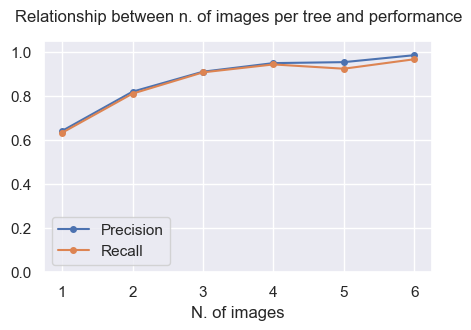

In [126]:
# Plot distribution of annotations per tree
n = 6#min(len(recalls_n_anns), len(precisions_n_anns))
fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(range(1, n+1), precisions_n_anns[:n], marker='o', markersize=4)
ax.plot(range(1, n+1), recalls_n_anns[:n], marker='o', markersize=4)
ax.set_title('Relationship between n. of images per tree and performance', y=1.05)
ax.legend(['Precision', 'Recall'])
plt.xlabel('N. of images')
plt.ylim(0, 1.05)
plt.savefig('visualizations/prec_rec_n_imgs.png', bbox_inches='tight', pad_inches=0)
plt.show()

### Show trees with no match

In [380]:
def show_trees_w_match(w_match, anns1, anns2, trees1, trees2, panos, ann_to_tree1, ann_to_tree2, filepath_imgs, n_trees, tree_ids_match, titles, show_gt_cutouts=False):

    if show_gt_cutouts:
        fig, axs = plt.subplots(1, n_trees, figsize=(2*n_trees, 2.7))
    
    # Iterate trees
    trees2_new = trees2[trees2['id'].isin(tree_ids_match)] if w_match else trees2[~trees2['id'].isin(tree_ids_match)]
    for i, (_, tree) in enumerate(trees2_new.sample(n_trees).iterrows()):

        # Get panos containing tree
        tree_id = int(tree['id'])
        ann_ids_tree = [int(ann_id) for ann_id, t_id in ann_to_tree2.items() if t_id == tree_id]
        img_ids_tree = [ann['image_id'] for ann in anns2['annotations'] if ann['id'] in ann_ids_tree]
        imgs_tree = [img for img in anns2['images'] if img['id'] in img_ids_tree]
        pano_ids_tree = [img['file_name'].split('.')[0].rstrip('_z2') for img in imgs_tree]
        panos_tree = {pano_id: pano for pano_id, pano in panos.items() if pano_id in pano_ids_tree}
        
        # Get nearest pano
        pano = get_nearest_panos(tree['lat'], tree['lng'], 1.2, 23, panos_tree)[0][0]
        add = '_z2' if imgs_tree[0]['file_name'].split('.')[0][-3:] == '_z2' else ''
        filename = f"{pano['Location']['panoId']}{add}.jpg"
        img_id = [img['id'] for img in anns1['images'] if img['file_name'] == filename][0]
        img = Image.open(f'{filepath_imgs}/{filename}')
        # print(f'Image ({int(img["id"])}) in ann_to_tree:', int(img['id']) in set(ann_to_tree.values()))

        # Get all predicted and gt trees in image
        anns1_img = [ann for ann in anns1['annotations'] if ann['image_id'] == img_id]
        anns2_img = [ann for ann in anns2['annotations'] if ann['image_id'] == img_id]
        if titles[0] == 'Predicted trees':
            anns1_img = [ann for ann in anns1_img if ann['score'] > 0.7]
        else:
            anns2_img = [ann for ann in anns2_img if str(ann['id']) in ann_to_tree2]
        anns2_img = [ann for ann in anns2_img if ann_to_tree2[str(ann['id'])] == tree_id]
        bboxes1 = [ann['bbox'] for ann in anns1_img]
        bboxes2 = [ann['bbox'] for ann in anns2_img]

        # Get location of trees
        trees1_locs = [trees1[trees1['id'] == ann_to_tree1[str(ann['id'])]][['lat', 'lng']].values[0] for ann in anns1_img if str(ann['id']) in ann_to_tree1]
        dists = [haversine_distance(*tree_locs, *tree[['lat', 'lng']].values) for tree_locs in trees1_locs]
        trees1_locs = [geo_coords_to_streetview_pixel(pano, *loc) for loc in trees1_locs]
        trees1_locs = np.array([np.array([round(x[0]), round(x[1])]) for x in trees1_locs])
        trees2_loc = geo_coords_to_streetview_pixel(pano, *tree[['lat', 'lng']].values)

        if not show_gt_cutouts:
            print(filename)
            print('Coordinates of tree in left image:', tree[['lat', 'lng']].values)
            if dists:
                print(f'Dist from tree in left image to closest tree in right: {round(min(dists), 2)} m')

        # Plot ground truth and predicted trees in image
        if not show_gt_cutouts:
            fig, axs = plt.subplots(1, 2, figsize=(15, 15))
            axs[0].imshow(img)
            show_anns(bboxes2, axs[0])
            # if anns2_img:
            if titles[1] == 'Predicted tree':
                for ann in anns2_img:
                    axs[0].text(ann['bbox'][0], ann['bbox'][1], f'{ann["score"]:.2f}', style='italic', 
                                bbox={'facecolor': 'white', 'alpha': 0.7, 'pad': 5})
            for tree_loc in trees1_locs:
                axs[0].plot(tree_loc[0], tree_loc[1], color='r', marker='o', markersize=3)
            axs[0].plot(trees2_loc[0], trees2_loc[1], color='lime', marker='o', markersize=3)
            axs[0].axis('off')
            axs[0].set_title(titles[1])
            axs[1].imshow(img)
            show_anns(bboxes1, axs[1])
            if anns1_img:
                if titles[0] == 'Predicted trees':
                    for ann in anns1_img:
                        axs[1].text(ann['bbox'][0], ann['bbox'][1], f'{ann["score"]:.2f}', style='italic', 
                                    bbox={'facecolor': 'white', 'alpha': 0.7, 'pad': 5})
            for tree_loc in trees1_locs:
                axs[1].plot(tree_loc[0], tree_loc[1], color='r', marker='o', markersize=3)
            axs[1].plot(trees2_loc[0], trees2_loc[1], color='lime', marker='o', markersize=3)
            axs[1].axis('off')
            axs[1].set_title(titles[0])
            plt.show()

        # Plot cutouts of gt trees
        else:
            bbox = bboxes2[0] if titles[0] == 'Predicted trees' else bboxes1[0]
            bbox = [round(e) for e in bbox]
            axs[i].imshow(np.array(img)[bbox[1]:bbox[1]+bbox[3], bbox[0]:bbox[0]+bbox[2]])
            axs[i].axis('off')
            print(tree['id'])
        
    if show_gt_cutouts:
        plt.suptitle(f'Trees in tree inventory with {"" if w_match else "no "}matched predicted tree', y=0.9)
        plt.tight_layout()
        plt.subplots_adjust(wspace=-0.3)
        plt.savefig(f'visualizations/gts{"" if w_match else "_no"}_match.png', bbox_inches='tight', pad_inches=0)
        plt.show()

In [157]:
# Load predicted trees
split = 'test'
trees_pred = pd.read_csv(f'data/predictions/predictions_{split}.csv')

# Load gt annotated trees in images
with open(f'data/annotations/annotations_{split}_single_label.json', 'r') as fp:
    anns_gt = json.load(fp)

# Load mappings from predicted annotation to cluster
with open(f'data/mappings/ann_to_cluster.json', 'r') as fp:
    ann_to_cluster = json.load(fp)

# # Load mappings from predicted tree to gt tree
# with open('data/mappings/pred_to_gt.json', 'r') as fp:
#     pred_to_gt = json.load(fp)
    
# Remove trees with no annotations
tree_ids_w_anns = set(mappings['ann_to_tree'].values())
trees_gt_w_img = trees_gt[trees_gt['id'].isin(tree_ids_w_anns)]

In [158]:
pred_to_gt_60 = match_preds_to_gts(trees_pred[trees_pred['max_score'] >= 0.6], trees_gt, max_dist_tp)

4U0nTSUlpH6Ycck9xWSu4A.jpg
Coordinates of tree in left image: [55.6684398601409 12.54568385523201]
Dist from tree in left image to closest tree in right: 2.29 m


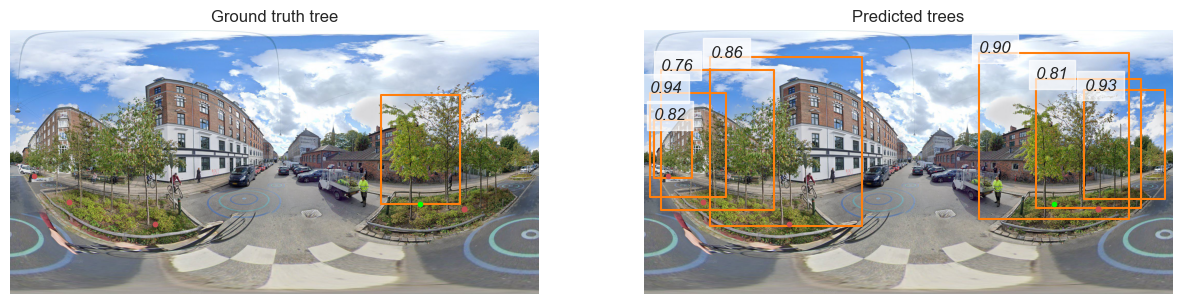

-03N4Eydjm1W1CYqn0Z9Yw.jpg
Coordinates of tree in left image: [55.66786678533605 12.563875439823208]
Dist from tree in left image to closest tree in right: 23.04 m


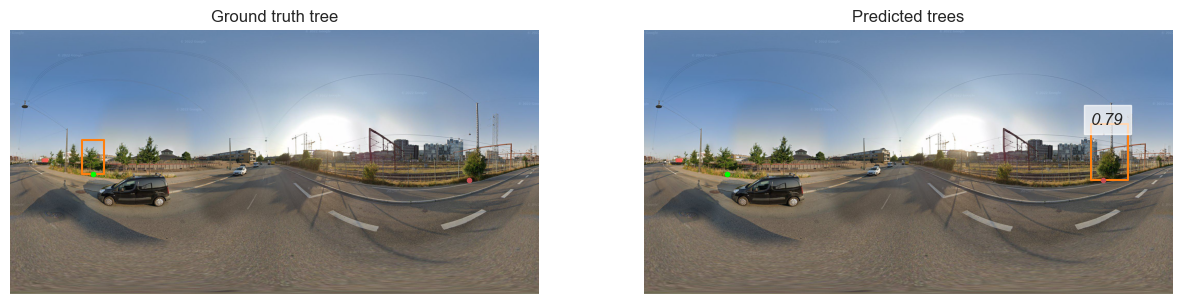

N3nSbWSfjAbE6PGHbo0p-Q.jpg
Coordinates of tree in left image: [55.66754586236998 12.501455392418071]


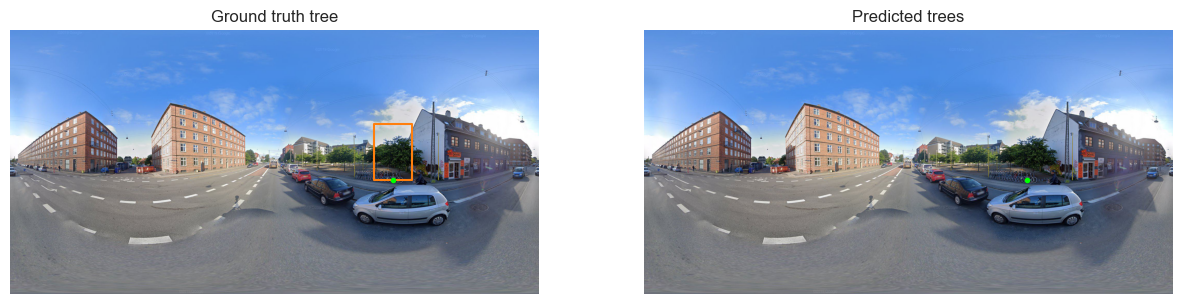

In [381]:
# Show gt trees with no matching predicted tree
match_dict_gt = {'w_match': False,
                 'anns1': anns_pred, 
                 'anns2': anns_gt, 
                 'trees1': trees_pred, 
                 'trees2': trees_gt_w_img, 
                 'panos': panos,
                 'ann_to_tree1': ann_to_cluster,
                 'ann_to_tree2': mappings['ann_to_tree'],
                 'filepath_imgs': 'data/streetviews',
                 'n_trees': 3, 
                 'tree_ids_match': set(pred_to_gt_60.values()),
                 'titles': ['Predicted trees', 'Ground truth tree'],
                 'show_gt_cutouts': False}
show_trees_w_match(**match_dict_gt)

pBTqFA1LKvIZJ4CkWeJezQ.jpg
Coordinates of tree in left image: [55.66288714 12.48310289]
Dist from tree in left image to closest tree in right: 5.7 m


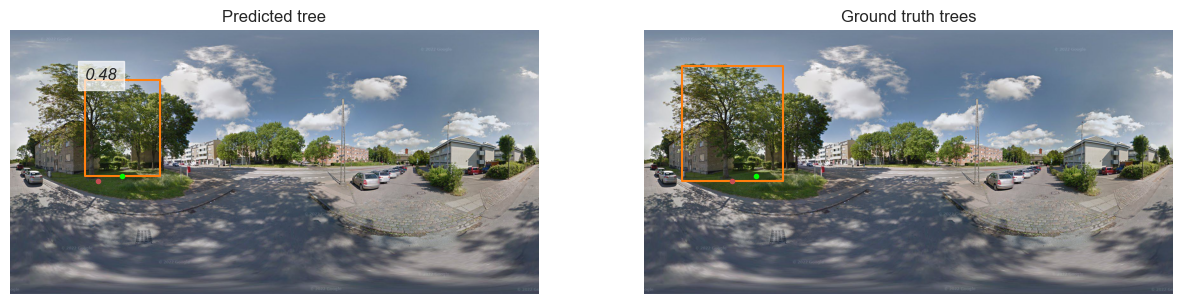

iFRsy1gzP18X9fCp39lquw.jpg
Coordinates of tree in left image: [55.65810503 12.55675025]
Dist from tree in left image to closest tree in right: 16.36 m


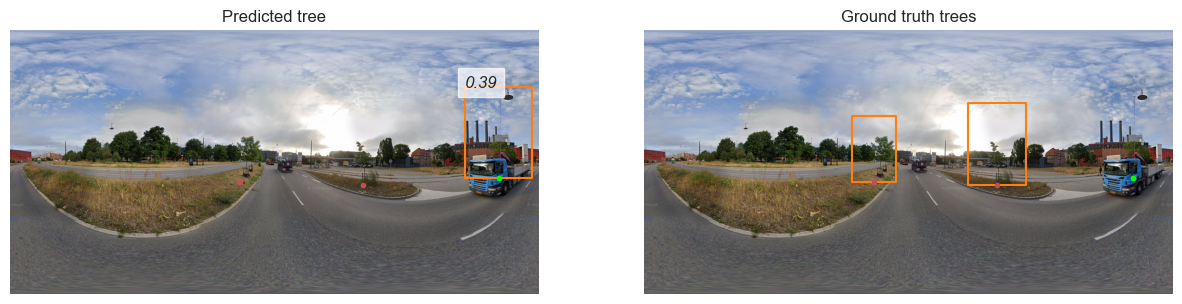

Qn6_E0EjYqzKqWteK_GHwg.jpg
Coordinates of tree in left image: [55.64177569 12.55044159]
Dist from tree in left image to closest tree in right: 3.94 m


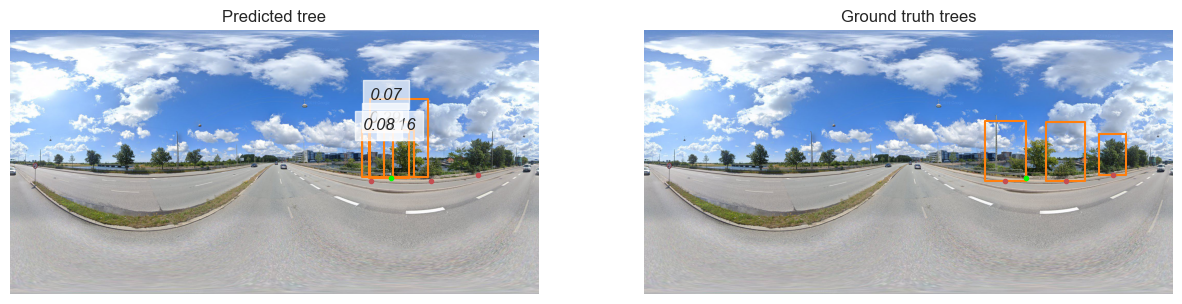

In [382]:
# Show predicted trees with no matching gt tree
match_dict_pred = {'w_match': False,
                   'anns1': anns_gt, 
                   'anns2': anns_pred, 
                   'trees1': trees_gt_w_img, 
                   'trees2': trees_pred, 
                   'panos': panos,
                   'ann_to_tree1': mappings['ann_to_tree'],
                   'ann_to_tree2': ann_to_cluster,
                   'filepath_imgs': 'data/streetviews',
                   'n_trees': 3, 
                   'tree_ids_match': [int(key) for key in pred_to_gt.keys()],
                   'titles': ['Ground truth trees', 'Predicted tree'],
                   'show_gt_cutouts': False}
show_trees_w_match(**match_dict_pred)

24452
24304
83377
1742
6300


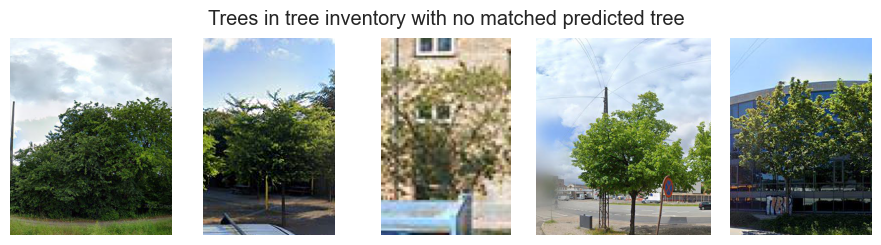

In [383]:
# Show cutout of gt trees without matching gt tree
match_dict_gt['w_match'] = False
match_dict_gt['show_gt_cutouts'] = True
match_dict_gt['n_trees'] = 5
show_trees_w_match(**match_dict_gt)

6364
88700
2079
1983
81970


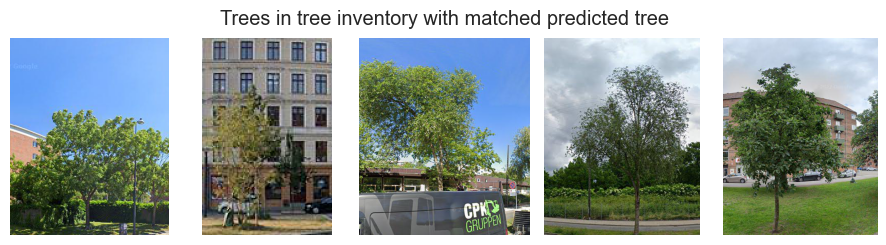

In [379]:
# Show cutout of gt trees with matching gt tree
match_dict_gt['w_match'] = True
match_dict_gt['show_gt_cutouts'] = True
match_dict_gt['n_trees'] = 5
show_trees_w_match(**match_dict_gt)

81957
2141
84259
71908
4960


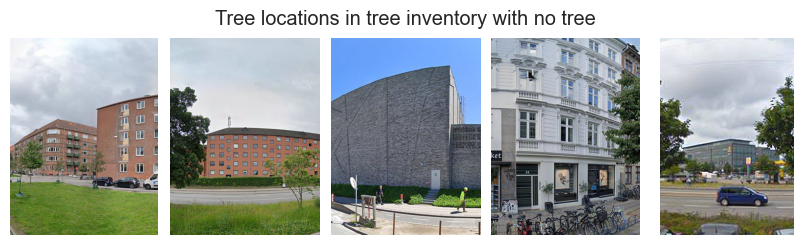

In [365]:
# Show specific examples of gt trees with no matched predicted tree
match_dict_gt['w_match'] = False
match_dict_gt['show_gt_cutouts'] = True
match_dict_gt['n_trees'] = 5
match_dict_gt['trees2'] = trees_gt_w_img[trees_gt_w_img['id'].isin([81957, 6616, 89749, 84259, 71908, 4960, 2141, 82399])]
show_trees_w_match(**match_dict_gt)

416
4893
5077
87385
83377


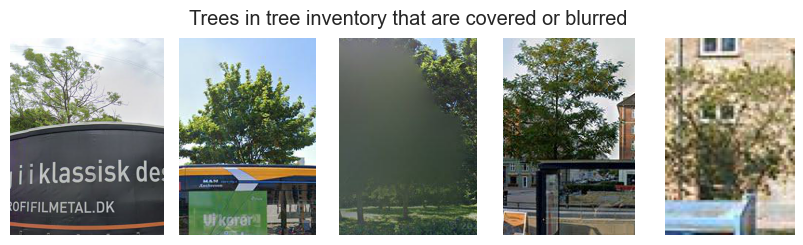

In [357]:
# Show specific examples of gt trees that are covered or blurred
match_dict_gt['n_trees'] = 5
match_dict_gt['trees2'] = trees_gt_w_img[trees_gt_w_img['id'].isin([416, 4893, 87385, 83377, 23830, 5077])]
show_trees_w_match(**match_dict_gt)

### Show predicted trees that are actually lampposts

In [27]:
import os
from utils import get_single_ann_file

In [28]:
# Load predicted trees
splits = ['train', 'val', 'test']
trees_pred = pd.concat([pd.read_csv(f'data/predictions/predictions_{split}.csv') for split in splits])

# Load mappings from predicted annotation to cluster
with open(f'data/mappings/ann_to_cluster.json', 'r') as fp:
    ann_to_cluster = json.load(fp)

# Load predicted annotated trees in images
with open(f'data/predictions/predictions_annotations_{split}.json', 'r') as fp:
    anns_pred = get_single_ann_file('data/predictions/predictions_annotations.json', splits)

In [33]:
filenames_lampposts = [filename for filename in os.listdir('data/images/lampposts') if filename[0] != '.']

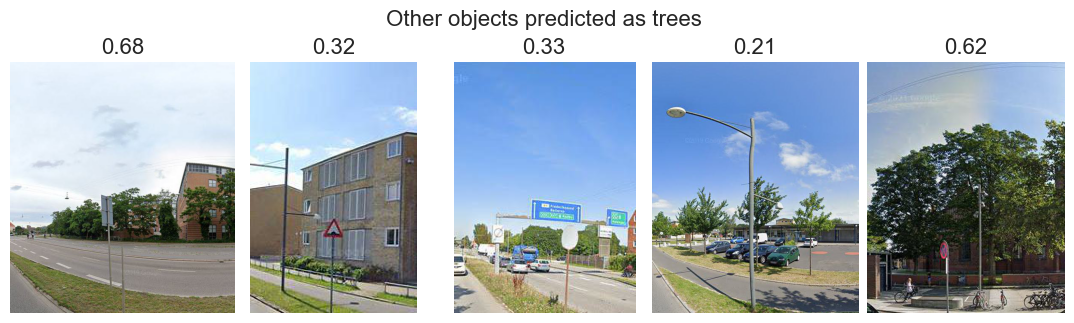

In [34]:
fig, axs = plt.subplots(1, 5, figsize=(15, 3.49))#, gridspec_kw={'width_ratios': [1, 1, 1, 1, 1]})
for filename, ax in zip(filenames_lampposts, axs):
    im = Image.open(f'data/images/lampposts/{filename}')
    tree_id = int(filename.split('.')[0])
    # tree = trees_pred[trees_pred['id'] == tree_id]
    # pano = get_nearest_panos(tree['lat'], tree['lng'], 1.2, 500, panos)[0][0]
    # filename = f"{pano['Location']['panoId']}.jpg"
    # img_id = [img['id'] for img in anns_pred['images'] if img['file_name'] == filename]
    # anns = [ann for ann in anns_pred['annotations'] if (ann_to_cluster[str(ann['id'])] == tree_id) & ann['image_id'] == img_id]
    # anns_scores = [ann['score'] for ann in anns]
    tree_score = trees_pred[trees_pred['id'] == tree_id]['max_score'].values[0]
    ax.imshow(im)
    # ax.set_title(round(anns_scores[max(anns_scores)]))
    ax.set_title(round(tree_score, 2), fontsize=16)
    ax.axis('off')
plt.suptitle('Other objects predicted as trees', y=0.92, fontsize=16)
plt.tight_layout()
plt.subplots_adjust(wspace=-0.66)
plt.savefig('visualizations/lampposts.png', bbox_inches='tight', pad_inches=0)
plt.show()

### Evaluate original model on Pasadena dataset

In [116]:
split = 'test'

# Load ground truth trees
trees_gt_pd = pd.read_csv('data/raw/tree_inventory_cleaned_pd.csv')
trees_gt_pd = trees_gt_pd[trees_gt_pd['split'] == split]

# Load ground truth annotated trees in images
with open(f'data/annotations/annotations_{split}_single_label_pd.json', 'r') as fp:
    anns_gt_pd = json.load(fp)
# Load predicted annotated trees in images
with open(f'data/predictions/predictions_annotations_{split}_pd.json', 'r') as fp:
    anns_pred_pd = json.load(fp)

# Load mappings from gt annotated trees in images to actual trees
with open(f'data/mappings/mappings_pd.json', 'r') as fp:
    mappings_pd = json.load(fp)

# Load panorama images
with open('data/raw/panos_2_pd.json', 'r') as fp:
    panos_pd = json.load(fp)

# Remove trees with no annotations
tree_ids_w_anns_pd = set(mappings_pd['ann_to_tree'].values())
trees_gt_pd = trees_gt_pd[trees_gt_pd['id'].isin(tree_ids_w_anns_pd)]

In [117]:
# Predict locations
filepath_preds_pd = f'data/predictions/predictions_{split}_pd.csv'
trees_pred_pd, ann_to_cluster_pd, _ = predict_locations(max_dist_cluster,
                                                        anns_pred_pd.copy(), 
                                                        panos_pd, 
                                                        ann_to_cluster={}, 
                                                        last_cluster_label=0,
                                                        filepath_preds=filepath_preds_pd)
with open('data/mappings/ann_to_cluster_pd.json', 'w') as fp:
    json.dump(ann_to_cluster_pd, fp)

In [118]:
# Get precisions and recalls at increasing confidence thresholds
n_thresholds = 100
precisions_pd, recalls_pd, thresholds_pd = get_precision_recall(trees_pred_pd, trees_gt_pd, n_thresholds, max_dist_tp)

In [119]:
# Get Average Precision
ap_pd = 0
for i in range(0, len(thresholds_pd)-1):
    ap_pd += (recalls_pd[i] - recalls_pd[i+1]) * precisions_pd[i]
print(f'Average precision (AP): {round(ap_pd, 3)}')

Average precision (AP): 0.692


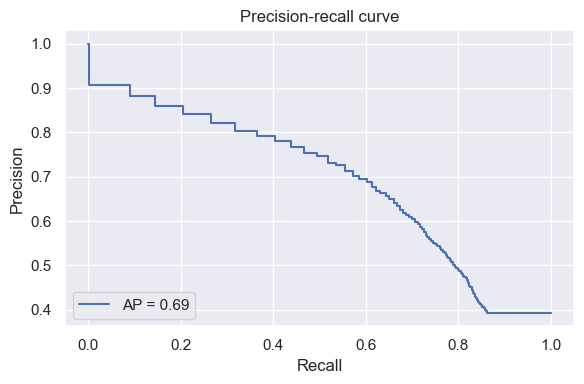

In [120]:
# Plot precision-recall curve
fig, ax = plt.subplots(figsize=(6, 4))
PrecisionRecallDisplay(precisions_pd, recalls_pd, average_precision=ap_pd).plot(ax=ax)
ax.set_title('Precision-recall curve')
plt.tight_layout()
# plt.savefig('visualizations/prec_rec.png', bbox_inches='tight', pad_inches=0)
plt.show()

In [121]:
# Get score threshold at best balance between precision and recall
f_score_pd = (2 * precisions_pd[1:-1] * recalls_pd[1:-1]) / (precisions_pd[1:-1] + recalls_pd[1:-1])
i_best_th_pd = len(f_score_pd) - np.argmax(f_score_pd[::-1])
print(f'Best confidence score threshold: {round(thresholds_pd[i_best_th_pd], 3)}')
print(f'\tF-score: {round(f_score_pd[i_best_th_pd], 3)}')
print(f'\tPrecision: {round(precisions_pd[i_best_th_pd], 3)}')
print(f'\tRecall: {round(recalls_pd[i_best_th_pd], 3)}')

Best confidence score threshold: 0.76
	F-score: 0.653
	Precision: 0.649
	Recall: 0.66


In [122]:
# Match predictions to gt trees
score_th = thresholds[i_best_th]
pred_to_gt_pd = match_preds_to_gts(trees_pred_pd[trees_pred_pd['max_score'] >= score_th], trees_gt_pd, max_dist_tp)
with open('data/mappings/pred_to_gt_pd.json', 'w') as fp:
    json.dump(pred_to_gt_pd, fp)

### Evaluate finetuned model on Pasadena dataset

In [123]:
# Load predicted annotated trees in images
with open(f'data/predictions/predictions_annotations_{split}_pd_ft.json', 'r') as fp:
    anns_pred_pd_ft = json.load(fp)

In [124]:
# Predict locations
filepath_preds_pd_ft = f'data/predictions/predictions_{split}_pd_ft.csv'
trees_pred_pd_ft, ann_to_cluster_pd_ft, _ = predict_locations(max_dist_cluster,
                                                              anns_pred_pd_ft.copy(), 
                                                              panos_pd, 
                                                              ann_to_cluster={}, 
                                                              last_cluster_label=0,
                                                              filepath_preds=filepath_preds_pd_ft)
with open('data/mappings/ann_to_cluster_pd_ft.json', 'w') as fp:
    json.dump(ann_to_cluster_pd_ft, fp)

In [125]:
# Get precisions and recalls at increasing confidence thresholds
n_thresholds = 100
precisions_pd_ft, recalls_pd_ft, thresholds_pd_ft = get_precision_recall(trees_pred_pd_ft, trees_gt_pd, n_thresholds, max_dist_tp)

In [126]:
# Get Average Precision
ap_pd_ft = 0
for i in range(0, len(thresholds_pd_ft)-1):
    ap_pd_ft += (recalls_pd_ft[i] - recalls_pd_ft[i+1]) * precisions_pd_ft[i]
print(f'Average precision (AP): {round(ap_pd_ft, 3)}')

Average precision (AP): 0.697


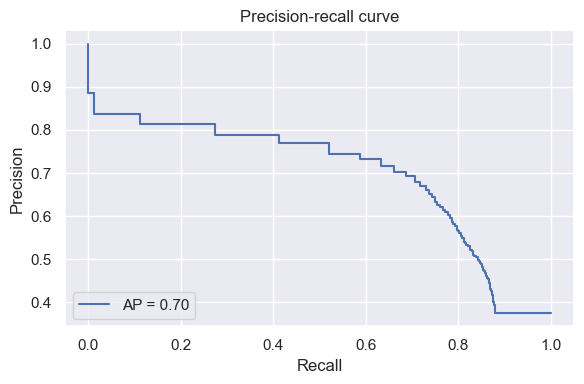

In [1581]:
# Plot precision-recall curve
fig, ax = plt.subplots(figsize=(6, 4))
PrecisionRecallDisplay(precisions_pd_ft, recalls_pd_ft, average_precision=ap_pd_ft).plot(ax=ax)
ax.set_title('Precision-recall curve')
plt.tight_layout()
# plt.savefig('visualizations/prec_rec.png', bbox_inches='tight', pad_inches=0)
plt.show()

In [1584]:
# Get score threshold at best balance between precision and recall
f_score_pd_ft = (2 * precisions_pd_ft[1:-1] * recalls_pd_ft[1:-1]) / (precisions_pd_ft[1:-1] + recalls_pd_ft[1:-1])
i_best_th_pd_ft = len(f_score_pd) - np.argmax(f_score_pd[::-1])
print(f'Best confidence score threshold: {round(thresholds_pd_ft[i_best_th_pd_ft], 3)}')
print(f'\tF-score: {round(f_score_pd_ft[i_best_th_pd_ft], 3)}')
print(f'\tPrecision: {round(precisions_pd_ft[i_best_th_pd_ft], 3)}')
print(f'\tRecall: {round(recalls_pd_ft[i_best_th_pd_ft], 3)}')

Best confidence score threshold: 0.76
	F-score: 0.673
	Precision: 0.582
	Recall: 0.792


In [1583]:
# Match predictions to gt trees
score_th = 0.8 #thresholds[i_best_th]
pred_to_gt_pd_ft = match_preds_to_gts(trees_pred_pd[trees_pred_pd['max_score'] >= score_th], trees_gt_pd, max_dist_tp)
with open('data/mappings/pred_to_gt_pd_ft.json', 'w') as fp:
    json.dump(pred_to_gt_pd_ft, fp)

In [1327]:
# Load mappings from predicted annotated tree to cluster
with open(f'data/mappings/ann_to_cluster_pd_ft.json', 'r') as fp:
    ann_to_cluster_pd_ft = json.load(fp)
# Load mappings from predicted tree to gt tree
with open('data/mappings/pred_to_gt_pd_ft.json', 'r') as fp:
    pred_to_gt_pd_ft = json.load(fp)

F6KBf18eZ25bbu2wu3uPvA_z2.jpg
Coordinates of tree in left image: [34.153361273436886 -118.11064326263438]
Dist from tree in left image to closest tree in right: 2.54 m


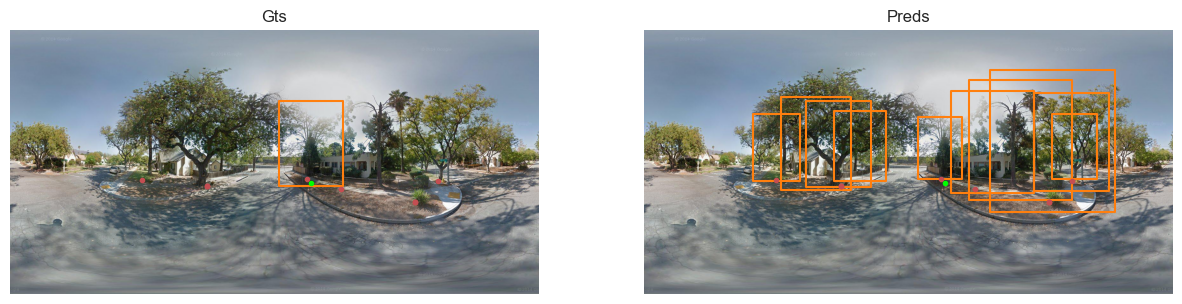

RHjeaYdFXhIekqNsWRmYuQ_z2.jpg
Coordinates of tree in left image: [34.161637171622 -118.11055933753823]
Dist from tree in left image to closest tree in right: 5.16 m


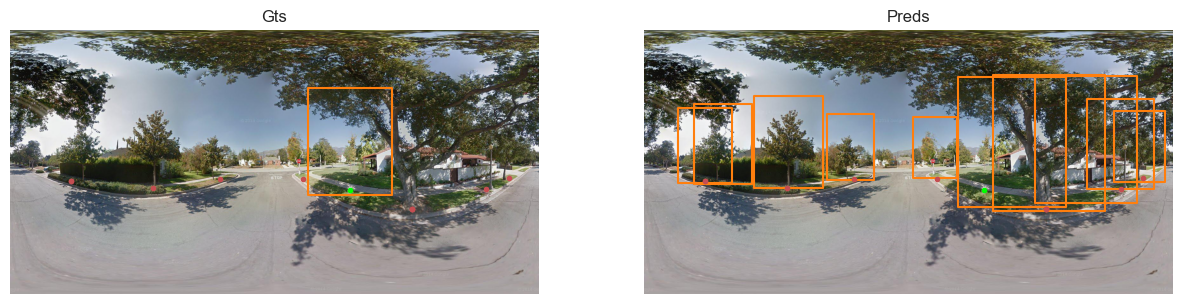

PvWjjenigL7kE0-DmaHDow_z2.jpg
Coordinates of tree in left image: [34.154432841659144 -118.11908973788292]
Dist from tree in left image to closest tree in right: 3.96 m


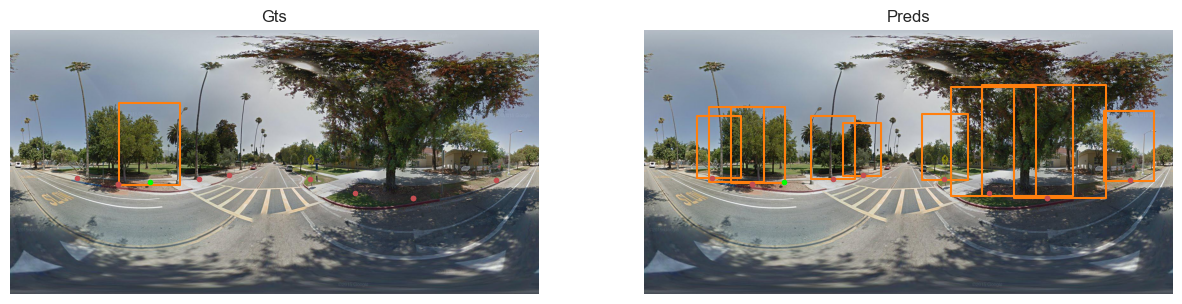

In [1477]:
# Show gt trees with no matching predicted tree
match_dict_gt_pd = {'w_match': False,
                    'anns1': anns_pred_pd_ft, 
                    'anns2': anns_gt_pd, 
                    'trees1': trees_pred_pd_ft, 
                    'trees2': trees_gt_pd, 
                    'panos': panos_pd,
                    'ann_to_tree1': ann_to_cluster_pd_ft,
                    'ann_to_tree2': mappings_pd['ann_to_tree'],
                    'filepath_imgs': 'data/images/pasadena_2',
                    'n_trees': 3, 
                    'tree_ids_match': set(pred_to_gt_pd_ft.values()),
                    'titles': ['Preds', 'Gts'],
                    'show_gt_cutouts': False}
show_trees_w_match(**match_dict_gt_pd)

AZw0EpobT2YVnhxk1fyfXg_z2.jpg
Coordinates of tree in left image: [  34.15716705 -118.11316194]
Dist from tree in left image to closest tree in right: 16.75 m


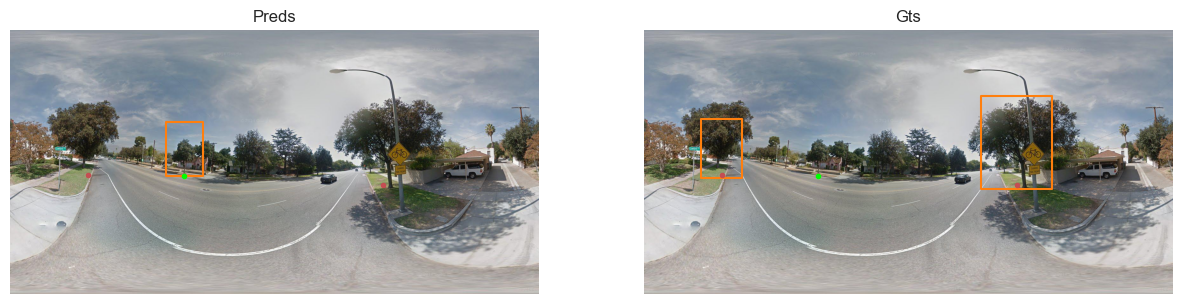

QMITFsemTvmfkbaG86So0A_z2.jpg
Coordinates of tree in left image: [  34.15319087 -118.11748596]
Dist from tree in left image to closest tree in right: 12.91 m


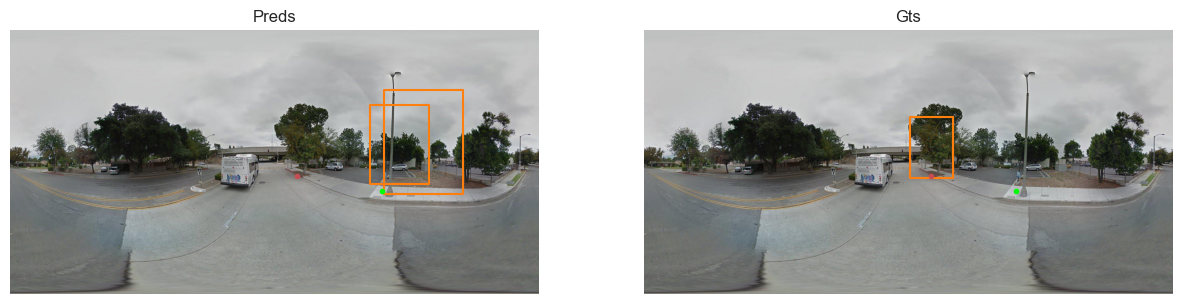

a0IrBXcA_YCy1I-yAuGgAw_z2.jpg
Coordinates of tree in left image: [  34.16244594 -118.10736112]
Dist from tree in left image to closest tree in right: 3.73 m


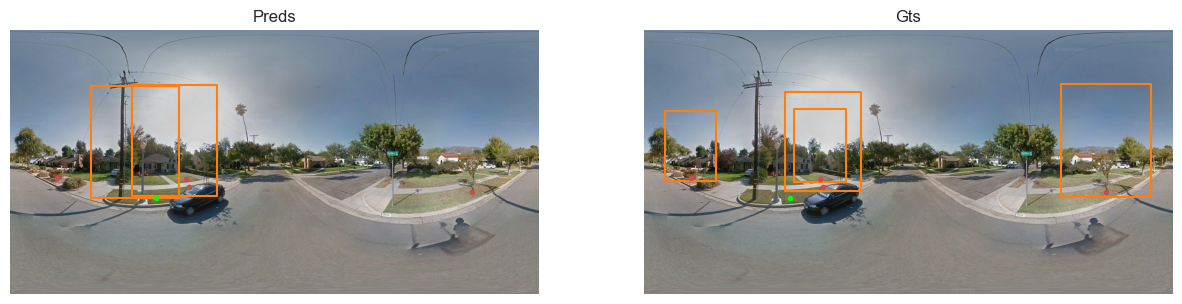

In [1478]:
# Show predicted trees with no matching gt tree
match_dict_pred_pd = {'w_match': False,
                      'anns1': anns_gt_pd, 
                      'anns2': anns_pred_pd_ft, 
                      'trees1': trees_gt_pd, 
                      'trees2': trees_pred_pd, 
                      'panos': panos_pd,
                      'ann_to_tree1': mappings_pd['ann_to_tree'],
                      'ann_to_tree2': ann_to_cluster_pd_ft,
                      'filepath_imgs': 'data/images/pasadena_2',
                      'n_trees': 3, 
                      'tree_ids_match': [int(key) for key in pred_to_gt_pd_ft.keys()],
                      'titles': ['Gts', 'Preds'],
                      'show_gt_cutouts': False}
show_trees_w_match(**match_dict_pred_pd)

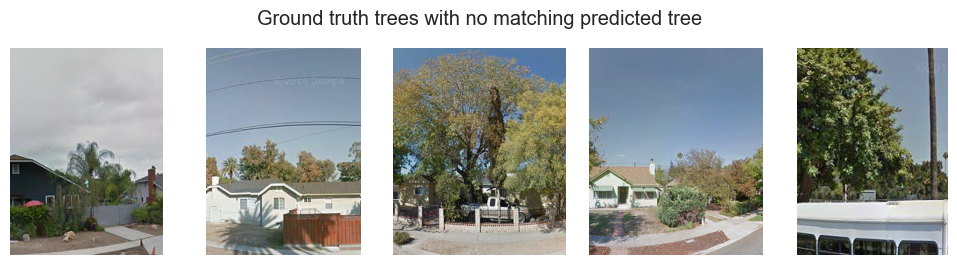

In [1483]:
# Show cutout of gt trees without matching predicted tree
match_dict_gt_pd['show_gt_cutouts'] = True
match_dict_gt_pd['n_trees'] = 5
show_trees_w_match(**match_dict_gt_pd)

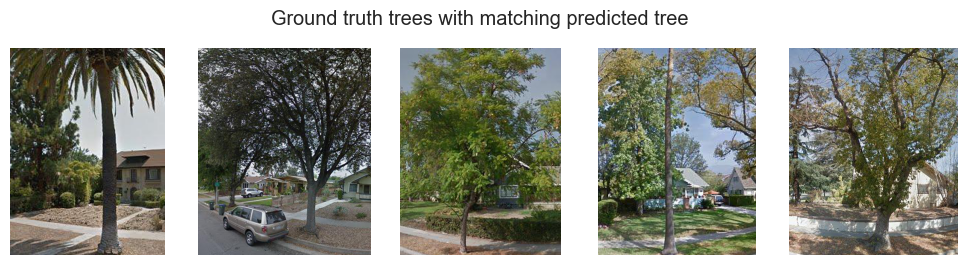

In [1484]:
# Show cutout of gt trees with matching predicted tree
match_dict_gt_pd['w_match'] = True
match_dict_gt_pd['show_gt_cutouts'] = True
match_dict_gt_pd['n_trees'] = 5
show_trees_w_match(**match_dict_gt_pd)